In [1]:
import oritelib as orite
import numpy  as np
import matplotlib.pyplot as plt


In [2]:
seq = orite.seq_from_fasta("test_data/clostridium_aceto.fna")
nc_intervals = orite.genbank_to_non_coding_intervals("test_data/clostridium_aceto.gbff")
gc, cgc = orite.gc_skew_sliding_window(seq, 250000)


In [3]:
interval_list = nc_intervals[0]

In [4]:
'''
Input: a list of non-coding intervals
Output: a list of the objects form NC_region class, containing sequence and cgc values
'''

def nc_intervals_to_nc_objects(nc_intervals, seq, cgc):
    nc_objcts = []
    for i in range(len(nc_intervals)):
        nc_obj = orite.NC_region(nc_intervals[i][0], nc_intervals[i][1])
        orite.add_sequence_to_region(seq, nc_obj)
        orite.calc_score_for_NC_region(cgc, nc_obj)
        nc_objcts.append(nc_obj)
    return nc_objcts

In [5]:
nc_regions = nc_intervals_to_nc_objects(interval_list, seq, cgc)

In [6]:
len(nc_regions)

3078

In [7]:
filtered_nc_objcts = orite.filter_regions_by_length(nc_regions, 50)

In [8]:
len(filtered_nc_objcts)

2089

In [9]:
def get_kmers_from_region_list(region_list, k_array):
    new_list = []
    for region in region_list:
        for k in k_array:
            region.add_kmer_counts(k)
        new_list.append(region)
    return new_list

In [10]:
k_array = [7,8,9,10]
kmers_from_region_list = get_kmers_from_region_list(filtered_nc_objcts, k_array)

In [11]:
def filter_region_list_by_kmer_occurence(region_list, n):
    new_list = []
    for region in region_list:
        region.filter_kmer_by_occurence(n)
        new_list.append(region)
    return new_list

In [12]:
region_list_by_occurence = filter_region_list_by_kmer_occurence(kmers_from_region_list, 3)

In [13]:
def has_empty_kmer_info(nc_region):

    for key, value in nc_region.kmer_info.items():
        if len(nc_region.kmer_info[key]) != 0:
            return False
    
    return True

In [14]:
def filter_empty_kmer_regions(region_list):
    new_list = []
    
    for region in region_list:
        if not has_empty_kmer_info(region):
            new_list.append(region)
    return new_list

In [15]:
filter_kmer_nc_objcts = filter_empty_kmer_regions(region_list_by_occurence)

In [16]:
def plot_region_list(region_list, curve):
    
    region_intervals = []
    
    for region in region_list:
        this_interval = (region.start, region.stop)
        region_intervals.append(this_interval)
    
    regions_pos_set = orite.interval_list_to_position_set(region_intervals)
    region_pos_list = list(regions_pos_set)
    region_pos_list.sort()
    
    relevant_pos_list = np.array(region_pos_list)
    
    relevant_curve_point = curve[relevant_pos_list]
    
    
    plt.figure(figsize=[40,10])
    plt.plot(curve)
    plt.plot(relevant_pos_list, relevant_curve_point, 'x')
    plt.title(str(len(region_list)))
    
    
    

    


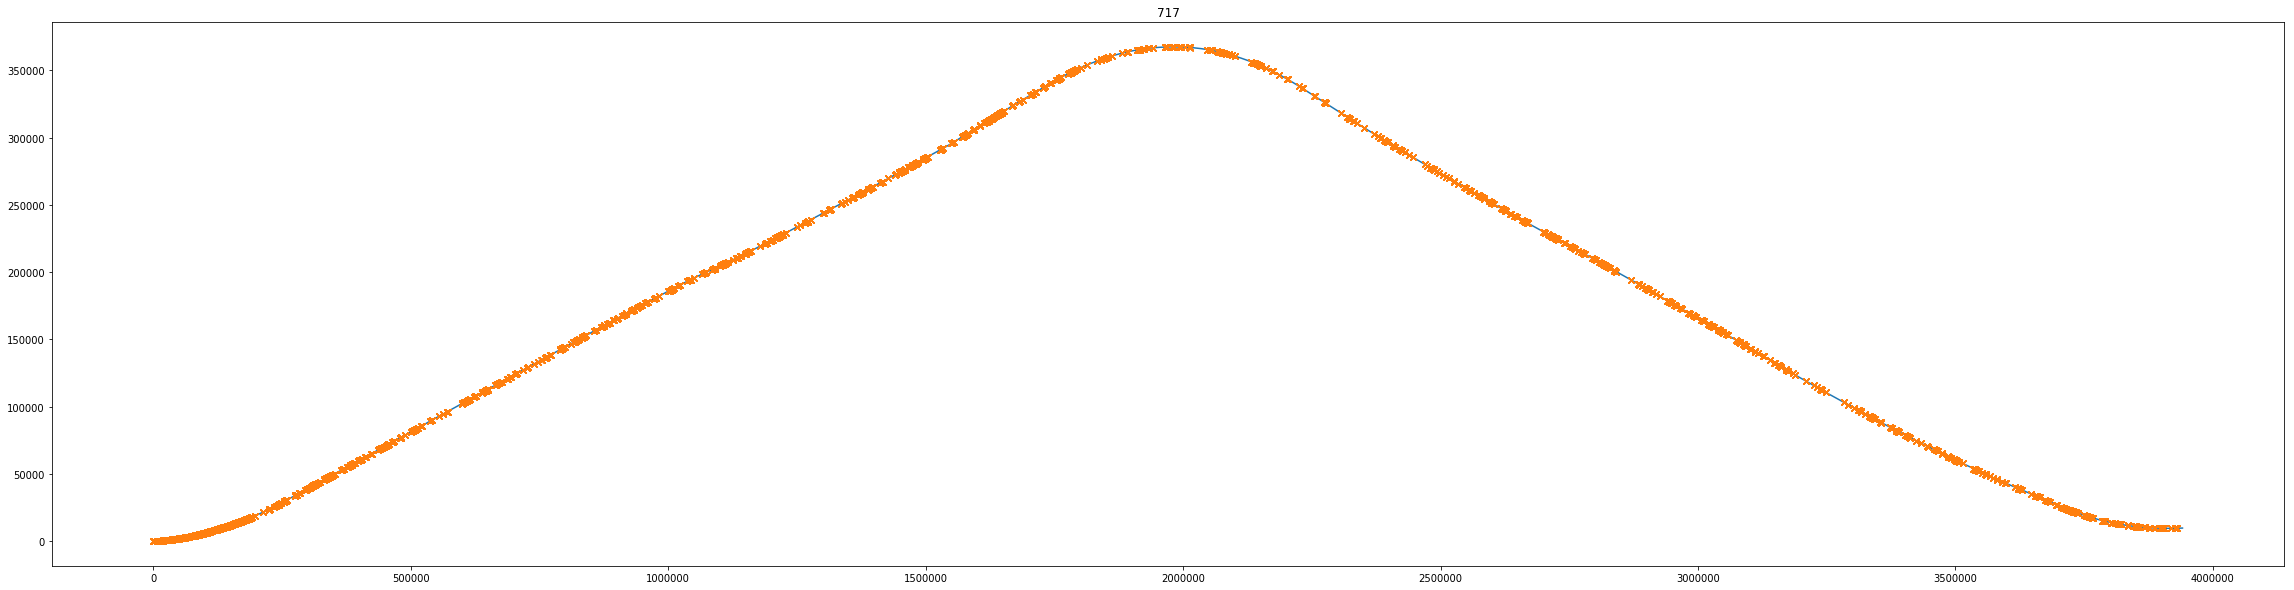

In [17]:
plot_region_list(filter_kmer_nc_objcts, cgc)


In [18]:
orite.sort_regions_by_score(filter_kmer_nc_objcts)

In [24]:
top_10_gcscore_list = filter_kmer_nc_objcts[0:50]

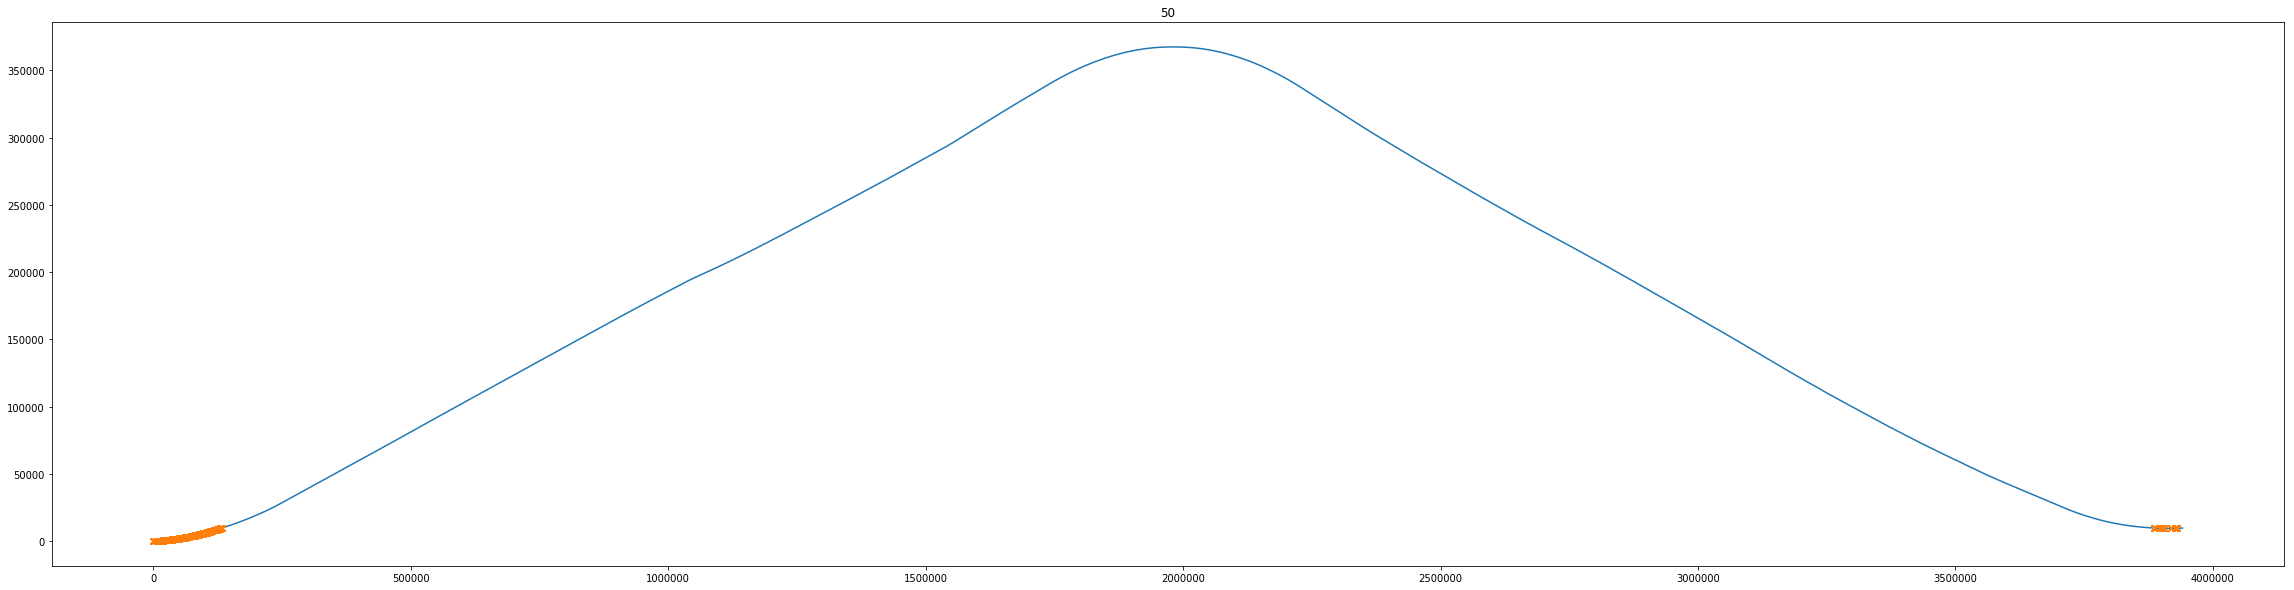

In [25]:
plot_region_list(top_10_gcscore_list, cgc)

In [21]:
i = 0
for region in top_10_gcscore_list:
    print('region:', i, '---',' score: ', region.cgc_val, '---- pos: ', region.start)
    
    for key, value in region.kmer_info.items():
        print('\tk=', key,)
        for thing in value:
            print('\t', thing[0], ' - ', thing[1])
    
    print('\t-------')
    
    
    
    
    i = i+1


region: 0 ---  score:  -4.021409535813797 ---- pos:  0
	k= 7
	 TTTTTTT  -  [5, 229, 230, 231, 232, 442]
	 ATTTTTT  -  [3, 228, 350, 441]
	 TATTTTT  -  [3, 227, 349, 388]
	 TTATTTT  -  [3, 226, 250, 387]
	 TTTTTTA  -  [3, 165, 351, 443]
	 TTTTTGT  -  [3, 98, 234, 390]
	 TGTTGAT  -  [3, 69, 204, 417]
	 TTTTATT  -  [3, 37, 224, 241]
	k= 8
	 TTTTTTTT  -  [3, 229, 230, 231]
	k= 9
	k= 10
	-------
region: 1 ---  score:  -34.67623919499956 ---- pos:  1808
	k= 7
	 GTTAATA  -  [3, 61, 90, 234]
	 TGTTAAT  -  [3, 60, 89, 233]
	k= 8
	 TGTTAATA  -  [3, 60, 89, 233]
	k= 9
	k= 10
	-------
region: 2 ---  score:  -134.87553547207895 ---- pos:  6681
	k= 7
	 AGAAAAT  -  [3, 25, 39, 287]
	k= 8
	k= 9
	k= 10
	-------
region: 3 ---  score:  -258.50956733070393 ---- pos:  7932
	k= 7
	 ATATAAA  -  [10, 384, 1021, 1355, 1440, 1485, 6370, 6781, 7319, 7345, 7377]
	 ATAAAAA  -  [9, 386, 729, 1581, 1608, 6717, 7268, 7379, 7533, 7870]
	 AATAATA  -  [9, 241, 503, 700, 1325, 1338, 1457, 7216, 7228, 7817]
	 TAAAAAA  -  

	 ATGATAA  -  [3, 4452, 6860, 7265]
	 GGGCTGA  -  [3, 4379, 4702, 5996]
	 TAGAGCA  -  [3, 4359, 6584, 7483]
	 GAGGTAG  -  [3, 4355, 4372, 5030]
	 GGGAGAA  -  [3, 4276, 5195, 6811]
	 AAATTCC  -  [3, 4215, 4281, 5407]
	 TAAAATT  -  [3, 4213, 7308, 7726]
	 GTAAAAT  -  [3, 4212, 7022, 7307]
	 AAGTAAA  -  [3, 4210, 6775, 7107]
	 CTATCCA  -  [3, 4186, 5080, 6923]
	 GAATAGG  -  [3, 4141, 5229, 5586]
	 GAAGGGA  -  [3, 4124, 5806, 6204]
	 TTGTAGA  -  [3, 4063, 7632, 7824]
	 ATCAAAA  -  [3, 4030, 5251, 6980]
	 GAAACCG  -  [3, 4009, 4173, 5780]
	 CAGGAGG  -  [3, 3985, 4931, 7767]
	 AGGGAAA  -  [3, 3964, 4126, 4473]
	 AGCTGGG  -  [3, 3900, 6049, 6655]
	 TGTGGGA  -  [3, 3893, 4531, 6535]
	 GTAAAAA  -  [3, 3837, 7201, 7709]
	 GATTTCT  -  [3, 3795, 4536, 7354]
	 AGCTTTA  -  [3, 3775, 4323, 5542]
	 CATTAAA  -  [3, 3769, 4578, 6032]
	 TCCGGGG  -  [3, 3750, 4631, 6611]
	 AGCGAAA  -  [3, 3715, 5275, 5403]
	 AAGTACC  -  [3, 3667, 3954, 7420]
	 GAATGAG  -  [3, 3580, 4343, 4368]
	 GATTTCC  -  [3, 3573, 3696

	 TAAAACTC  -  [4, 123, 1358, 2196, 2648]
	 AGATATAG  -  [3, 7146, 7170, 7468]
	 AAGATATA  -  [3, 6986, 7169, 7467]
	 AAAGATAT  -  [3, 6985, 7168, 7466]
	 ATTATATA  -  [3, 6762, 6867, 7157]
	 TATATTAA  -  [3, 6383, 7161, 7248]
	 AGTAGGTC  -  [3, 5216, 6003, 6543]
	 GCTGAAGT  -  [3, 4704, 5282, 5998]
	 AGAAAGAA  -  [3, 3683, 7363, 7841]
	 TTAAATAT  -  [3, 3447, 6830, 7313]
	 TTAATTCT  -  [3, 3351, 3426, 7605]
	 GAGCAAAA  -  [3, 3017, 6931, 7485]
	 AAAAAGAT  -  [3, 2993, 6720, 6983]
	 GTTTAATT  -  [3, 2697, 3335, 3349]
	 GGAAGTAC  -  [3, 2629, 4959, 7418]
	 TAAAGGAT  -  [3, 2313, 4524, 7516]
	 GGAGGAAG  -  [3, 2235, 2917, 3675]
	 GTGAGGTA  -  [3, 2022, 3181, 5028]
	 ATACCGCA  -  [3, 1935, 3004, 4895]
	 CTAAAGGA  -  [3, 1738, 7085, 7515]
	 ATAAAAAT  -  [3, 1608, 7268, 7533]
	 AATAAAAA  -  [3, 1607, 7532, 7869]
	 AAGATTAA  -  [3, 1600, 1928, 2643]
	 CAAGATTA  -  [3, 1599, 2642, 6246]
	 TGCAGCAA  -  [3, 1555, 2157, 4091]
	 TTATTTTA  -  [3, 1516, 6751, 6907]
	 CAAAAAGA  -  [3, 1496, 2992, 69

	 TATTAAA  -  [8, 104, 2000, 2514, 2839, 3259, 5608, 5975, 8049]
	 TTGGTGA  -  [7, 2648, 2983, 3883, 4626, 5377, 5797, 7635]
	 AAGAAAA  -  [7, 2318, 2392, 3154, 3399, 6667, 7248, 7298]
	 AATTTTA  -  [7, 1379, 2891, 3045, 3366, 4607, 4811, 6849]
	 GATAATA  -  [7, 1323, 2173, 2359, 3648, 6280, 7292, 7591]
	 TTCAATA  -  [7, 1305, 1454, 2031, 2775, 4067, 5189, 8017]
	 AAATGAT  -  [7, 1235, 1982, 4729, 5999, 7597, 8059, 8074]
	 TAAATGA  -  [7, 1234, 3376, 4728, 5998, 7509, 7596, 8058]
	 ATAAATG  -  [7, 1215, 5997, 6613, 6972, 7508, 7595, 8057]
	 ATTTATT  -  [7, 1108, 1423, 1926, 2335, 3546, 3750, 7033]
	 AAAGATG  -  [7, 1053, 2077, 3210, 5006, 5209, 6712, 7205]
	 ATTATTT  -  [7, 1046, 2654, 3747, 4382, 4536, 4961, 5596]
	 ATAAGAA  -  [7, 936, 1080, 2228, 4071, 6049, 6665, 7296]
	 TATATTT  -  [7, 698, 1337, 1895, 2332, 3629, 7279, 7477]
	 TTAAATA  -  [7, 687, 795, 1093, 2500, 6956, 8051, 8277]
	 AATAAAG  -  [7, 671, 2290, 2503, 3276, 4322, 7892, 8207]
	 ATGGATA  -  [7, 439, 786, 2327, 3814, 

	 TTGAATA  -  [4, 1866, 4467, 4564, 5868]
	 ATAAACT  -  [4, 1840, 3706, 6730, 7842]
	 TGGTGAT  -  [4, 1826, 2649, 2984, 5798]
	 GTCAAAA  -  [4, 1817, 4353, 4456, 4799]
	 ATTAAAG  -  [4, 1757, 2533, 2840, 5976]
	 TAAATTA  -  [4, 1754, 1883, 1937, 3800]
	 ATAAATT  -  [4, 1753, 2428, 2662, 3799]
	 GGAGGAA  -  [4, 1719, 1973, 2761, 8096]
	 ACTGAAA  -  [4, 1710, 4224, 6460, 7076]
	 AGCAGTA  -  [4, 1683, 4233, 5180, 7687]
	 TAGCAGT  -  [4, 1682, 3595, 4232, 6342]
	 TAATAGC  -  [4, 1679, 3994, 4486, 5329]
	 TTAATAA  -  [4, 1675, 2288, 5698, 6782]
	 ATTGAAT  -  [4, 1661, 1865, 4097, 4466]
	 AAGATGG  -  [4, 1629, 5007, 5210, 6713]
	 GTGAAAA  -  [4, 1599, 3897, 4629, 6154]
	 AGGTGAA  -  [4, 1597, 3124, 4276, 6921]
	 ATAGTAT  -  [4, 1585, 1645, 2704, 7583]
	 GGAAAAA  -  [4, 1578, 1976, 5883, 6472]
	 CTATAAT  -  [4, 1519, 1908, 6555, 7791]
	 TTCAATT  -  [4, 1501, 2046, 2193, 4708]
	 CAATATC  -  [4, 1456, 3847, 5646, 5899]
	 CAAAAGT  -  [4, 1434, 4355, 5389, 6197]
	 ATATTTA  -  [4, 1421, 1671, 2333

	 AATACAA  -  [3, 2546, 4281, 4898]
	 GAATACA  -  [3, 2545, 4280, 4469]
	 AAATGTT  -  [3, 2518, 3878, 5576]
	 CTATTAA  -  [3, 2513, 2838, 5607]
	 AAAGAAC  -  [3, 2506, 5837, 7895]
	 TAAATGT  -  [3, 2474, 2517, 2950]
	 TCTAAAT  -  [3, 2472, 2937, 3036]
	 AGTCTAA  -  [3, 2470, 3034, 3579]
	 GATGTTA  -  [3, 2449, 6289, 7115]
	 TTAATAG  -  [3, 2443, 5328, 6097]
	 CTTTAAT  -  [3, 2441, 2676, 7981]
	 AAATTCA  -  [3, 2430, 2664, 3005]
	 TCTAAAA  -  [3, 2418, 3522, 3581]
	 TACAGGT  -  [3, 2412, 4472, 7732]
	 ATAATCT  -  [3, 2405, 2735, 8031]
	 GAAAAAT  -  [3, 2394, 3899, 4891]
	 GGATTAA  -  [3, 2387, 5136, 6094]
	 TTCATTA  -  [3, 2374, 3771, 5663]
	 TGGTATA  -  [3, 2367, 4103, 7952]
	 AATGGTA  -  [3, 2365, 4101, 7950]
	 TAATGGT  -  [3, 2364, 2379, 3356]
	 TGATAAT  -  [3, 2358, 2403, 3353]
	 GGATATA  -  [3, 2329, 3816, 7727]
	 AAGGAGA  -  [3, 2294, 4051, 7424]
	 TGATATA  -  [3, 2274, 6561, 6609]
	 AAGGAAC  -  [3, 2264, 5874, 7974]
	 AATACTT  -  [3, 2212, 4301, 8020]
	 TTTTTTC  -  [3, 2186, 4846

	 ATAAATAA  -  [7, 708, 1836, 2224, 3171, 3270, 4503, 6968]
	 AAATAAAA  -  [7, 638, 797, 2684, 3173, 4505, 4512, 6158]
	 ATAAAAGA  -  [7, 504, 3207, 4254, 6160, 7016, 7613, 7859]
	 TATATATA  -  [7, 428, 2277, 2794, 2796, 7308, 7310, 7312]
	 AAATAATA  -  [7, 110, 224, 1742, 1955, 3272, 4894, 6324]
	 AAAAATAA  -  [7, 108, 636, 2731, 3435, 4510, 4892, 7889]
	 ATAAAGAA  -  [6, 2504, 3151, 3396, 4375, 5835, 7893]
	 AAAATATA  -  [6, 2421, 2717, 3177, 4459, 4498, 5992]
	 AAGATAAT  -  [6, 1321, 2171, 3646, 4020, 4715, 7716]
	 ATTATTTA  -  [6, 1046, 3747, 4382, 4536, 4961, 5596]
	 TTATATAA  -  [6, 932, 1383, 1776, 1832, 2220, 6039]
	 GATAAAGA  -  [6, 825, 1317, 3150, 3395, 4374, 6136]
	 TAAATAAA  -  [6, 796, 1837, 2501, 3172, 4504, 6969]
	 AAATATAA  -  [6, 779, 2718, 3039, 4499, 5993, 8053]
	 TTTTAAAT  -  [6, 685, 1091, 1880, 2498, 4725, 6770]
	 ATTTTAAA  -  [6, 684, 1090, 2497, 4724, 4812, 6006]
	 TAAAAGAT  -  [6, 505, 3208, 3292, 5207, 7815, 7860]
	 AATAAAAG  -  [6, 503, 3206, 4194, 4253, 615

	 AAAAGTTA  -  [3, 1435, 3566, 5390]
	 TATTTATT  -  [3, 1422, 2334, 3749]
	 TTTATATA  -  [3, 1382, 1775, 6038]
	 ATTTTATA  -  [3, 1380, 2657, 7554]
	 TTAATTTT  -  [3, 1377, 2889, 3364]
	 TAATGGAG  -  [3, 1294, 2757, 7384]
	 ATAATGAG  -  [3, 1254, 5344, 6692]
	 AAATAAAT  -  [3, 1213, 3797, 6970]
	 ACAAATAA  -  [3, 1211, 1963, 3795]
	 AACAAATA  -  [3, 1210, 1962, 3794]
	 AACTGATA  -  [3, 1151, 4634, 4832]
	 ATGTAACT  -  [3, 1147, 3421, 6413]
	 AAAATATC  -  [3, 1139, 3402, 5402]
	 TTTATTTT  -  [3, 1109, 3547, 3751]
	 AGATTTAT  -  [3, 1106, 6394, 7031]
	 AAGATTTA  -  [3, 1105, 6393, 7818]
	 CATTTTAA  -  [3, 1089, 2496, 4723]
	 TCATTTTA  -  [3, 1088, 2495, 4722]
	 AAGATGTA  -  [3, 1054, 4993, 7206]
	 TTAAAGAT  -  [3, 1051, 2168, 2841]
	 AAAAATGA  -  [3, 1002, 1980, 7154]
	 GTAGATAA  -  [3, 996, 6277, 7838]
	 CTTTTATA  -  [3, 986, 1542, 6036]
	 TATAGATG  -  [3, 959, 1649, 7369]
	 ATAAGAAA  -  [3, 936, 6665, 7296]
	 ATATAAGA  -  [3, 934, 1078, 2720]
	 ATTATATA  -  [3, 931, 1831, 2219]
	 TTGTA

	 TTTATTT  -  [3, 812, 925, 1216]
	 ATTTATT  -  [3, 811, 1191, 1215]
	 TCTTTTA  -  [3, 757, 1049, 1127]
	 ACAGGCA  -  [3, 661, 830, 875]
	 TTCAGGA  -  [3, 610, 817, 1018]
	 TTTTGAA  -  [3, 409, 423, 779]
	 TTATTTC  -  [3, 399, 792, 813]
	 TATTATT  -  [3, 397, 519, 790]
	 TTTAAAA  -  [3, 376, 689, 1130]
	 AGGAATT  -  [3, 329, 820, 1021]
	 GGTTCAT  -  [3, 311, 551, 680]
	 CATTTTC  -  [3, 270, 555, 1036]
	 AATTTAT  -  [3, 230, 1190, 1214]
	 TTGAAAT  -  [3, 223, 425, 966]
	 ACTTATA  -  [3, 216, 700, 745]
	 AGCACTT  -  [3, 157, 343, 697]
	 AGAGGTT  -  [3, 124, 548, 1312]
	 TTATTTA  -  [3, 118, 809, 926]
	 AGTTATT  -  [3, 116, 256, 861]
	 TTTAAGG  -  [3, 54, 101, 929]
	 ATTTAAG  -  [3, 53, 100, 928]
	 AATTTAA  -  [3, 52, 99, 354]
	 TAATTTA  -  [3, 51, 229, 1189]
	 AAATAAT  -  [3, 48, 226, 320]
	 TATAAGA  -  [3, 40, 490, 1000]
	 AATATAT  -  [3, 21, 1233, 1285]
	k= 8
	 ATTTAAGG  -  [3, 53, 100, 928]
	k= 9
	k= 10
	-------
region: 8 ---  score:  -1144.4792614804144 ---- pos:  33638
	k= 7
	 AATAA

	 AATTTAA  -  [3, 705, 1402, 2654]
	 TTAATTT  -  [3, 703, 1184, 1280]
	 ATTAATT  -  [3, 702, 1279, 1950]
	 ATATAAT  -  [3, 588, 864, 2514]
	 AATATGT  -  [3, 580, 1347, 2814]
	 TATTGTT  -  [3, 561, 4022, 4288]
	 ATAAATT  -  [3, 548, 3111, 3203]
	 TTAAAAT  -  [3, 543, 1850, 2657]
	 TTTTAAA  -  [3, 541, 1848, 3559]
	 AAATTTT  -  [3, 538, 550, 1742]
	 GATAAAA  -  [3, 534, 2581, 4358]
	 TAAGAAA  -  [3, 524, 1395, 4324]
	 ATAATAA  -  [3, 508, 3033, 3108]
	 AAAGAGT  -  [3, 494, 908, 4391]
	 GTTGACA  -  [3, 483, 565, 3515]
	 TAAAAAC  -  [3, 476, 1103, 3716]
	 ATATTAA  -  [3, 468, 1160, 2212]
	 AATATTA  -  [3, 467, 1175, 2080]
	 AGATAAA  -  [3, 456, 462, 2580]
	 ATTATGT  -  [3, 448, 2002, 2038]
	 AAAATTA  -  [3, 445, 1168, 2659]
	 CTAAAAA  -  [3, 440, 3079, 3731]
	 AAATTAT  -  [3, 433, 446, 3205]
	 TAAATTA  -  [3, 432, 3204, 3448]
	 TTAAATT  -  [3, 431, 1915, 3603]
	 CATTAAA  -  [3, 416, 488, 3126]
	 TGGATTT  -  [3, 403, 2896, 4270]
	 AGTGGAT  -  [3, 401, 498, 4207]
	 CAAGTGG  -  [3, 399, 746, 